##         STUDENTS ADDICTION ON SOCIAL MEDIA


####        Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####        Importing Data


In [2]:
df = pd.read_csv("C:/Banu for fun/Data Analytics/Python/Project/Students addiction on social media.csv")


####       Initial Data Exploration and Structure Overview


In [3]:
df.sample(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
449,450,21,Male,Graduate,Canada,4.1,Instagram,Yes,8.1,6,Single,3,7
535,536,22,Male,Graduate,Malaysia,5.8,WhatsApp,Yes,6.5,6,Single,3,7
40,41,24,Male,Graduate,South Africa,2.3,LinkedIn,No,7.3,8,In Relationship,1,4
91,92,19,Female,Undergraduate,Albania,4.7,TikTok,Yes,5.8,6,Complicated,3,7
174,175,20,Female,Undergraduate,Nepal,5.7,TikTok,Yes,5.6,6,Single,4,8
445,446,21,Male,Graduate,Turkey,4.3,Instagram,Yes,7.9,6,Single,3,7
585,586,23,Male,Graduate,Poland,6.4,Facebook,Yes,6.3,5,Single,4,8
301,302,21,Male,Graduate,UK,4.8,Facebook,Yes,6.8,6,In Relationship,3,7
51,52,20,Female,Undergraduate,Paraguay,4.7,TikTok,Yes,5.8,6,In Relationship,3,7
270,271,20,Female,Undergraduate,Australia,4.5,Instagram,No,7.3,7,Single,2,5


In [4]:
print("No of Rows & Columns :", df.shape)

No of Rows & Columns : (705, 13)


In [5]:
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [6]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [7]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


This section offers a comprehensive initial exploration of the dataset, highlighting its structure, data types, and a sample of entries. 
It also checks for missing values and provides basic statistical insights to understand the data distribution.



####       Data Cleaning


In [8]:
df.nunique()

Student_ID                      705
Age                               7
Gender                            2
Academic_Level                    3
Country                         110
Avg_Daily_Usage_Hours            67
Most_Used_Platform               12
Affects_Academic_Performance      2
Sleep_Hours_Per_Night            59
Mental_Health_Score               6
Relationship_Status               3
Conflicts_Over_Social_Media       6
Addicted_Score                    8
dtype: int64

In [9]:
df.duplicated().any()


False

In [10]:
columns = [
    "Academic_Level",
    "Country",
    "Most_Used_Platform",
    "Affects_Academic_Performance",
    "Relationship_Status"
]

for col in columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Academic_Level':
['Undergraduate' 'Graduate' 'High School']

Unique values in 'Country':
['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru'
 'Venezuela' 'Ecuador' 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica'
 'Panama' 'Jamaica' 'Trinidad' 'Bahamas' 'Iceland' 'Finland' 'Poland'
 'Romania' 'Hungary' 'Czech Republic' 'Slovakia' 'Croatia' 'Serbia'
 'Slovenia' 'Bulgaria' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Moldova'
 'Belarus' 'Kazakhstan' 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan' 'Armenia'
 'Georgia' 'Azerbaijan' 'Cyprus' 'Malta' 'Luxembourg' 'M

In [11]:
df['Country'] = df['Country'].replace({'USA':'United States of America','UK' :'United Kingdom', 'UAE' : 'United Arab Emirates'})

In [12]:
columns = [
    "Academic_Level",
    "Country",
    "Most_Used_Platform",
    "Affects_Academic_Performance",
    "Relationship_Status"
]

for col in columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Academic_Level':
['Undergraduate' 'Graduate' 'High School']

Unique values in 'Country':
['Bangladesh' 'India' 'United States of America' 'United Kingdom' 'Canada'
 'Australia' 'Germany' 'Brazil' 'Japan' 'South Korea' 'France' 'Spain'
 'Italy' 'Mexico' 'Russia' 'China' 'Sweden' 'Norway' 'Denmark'
 'Netherlands' 'Belgium' 'Switzerland' 'Austria' 'Portugal' 'Greece'
 'Ireland' 'New Zealand' 'Singapore' 'Malaysia' 'Thailand' 'Vietnam'
 'Philippines' 'Indonesia' 'Taiwan' 'Hong Kong' 'Turkey' 'Israel'
 'United Arab Emirates' 'Egypt' 'Morocco' 'South Africa' 'Nigeria' 'Kenya'
 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru' 'Venezuela' 'Ecuador'
 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica' 'Panama' 'Jamaica' 'Trinidad'
 'Bahamas' 'Iceland' 'Finland' 'Poland' 'Romania' 'Hungary'
 'Czech Republic' 'Slovakia' 'Croatia' 'Serbia' 'Slovenia' 'Bulgaria'
 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Moldova' 'Belarus' 'Kazakhstan'
 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan' 'Armenia' 'Geor

In [13]:
CountryCode = {
    'Bangladesh': 'BD',
    'India': 'IN',
    'United States of America': 'US',
    'United Kingdom': 'GB',
    'Canada': 'CA',
    'Australia': 'AU',
    'Germany': 'DE',
    'Brazil': 'BR',
    'Japan': 'JP',
    'South Korea': 'KR',
    'France': 'FR',
    'Spain': 'ES',
    'Italy': 'IT',
    'Mexico': 'MX',
    'Russia': 'RU',
    'China': 'CN',
    'Sweden': 'SE',
    'Norway': 'NO',
    'Denmark': 'DK',
    'Netherlands': 'NL',
    'Belgium': 'BE',
    'Switzerland': 'CH',
    'Austria': 'AT',
    'Portugal': 'PT',
    'Greece': 'GR',
    'Ireland': 'IE',
    'New Zealand': 'NZ',
    'Singapore': 'SG',
    'Malaysia': 'MY',
    'Thailand': 'TH',
    'Vietnam': 'VN',
    'Philippines': 'PH',
    'Indonesia': 'ID',
    'Taiwan': 'TW',
    'Hong Kong': 'HK',
    'Turkey': 'TR',
    'Israel': 'IL',
    'United Arab Emirates': 'AE',
    'Egypt': 'EG',
    'Morocco': 'MA',
    'South Africa': 'ZA',
    'Nigeria': 'NG',
    'Kenya': 'KE',
    'Ghana': 'GH',
    'Argentina': 'AR',
    'Chile': 'CL',
    'Colombia': 'CO',
    'Peru': 'PE',
    'Venezuela': 'VE',
    'Ecuador': 'EC',
    'Uruguay': 'UY',
    'Paraguay': 'PY',
    'Bolivia': 'BO',
    'Costa Rica': 'CR',
    'Panama': 'PA',
    'Jamaica': 'JM',
    'Trinidad': 'TT', 
    'Bahamas': 'BS',
    'Iceland': 'IS',
    'Finland': 'FI',
    'Poland': 'PL',
    'Romania': 'RO',
    'Hungary': 'HU',
    'Czech Republic': 'CZ',
    'Slovakia': 'SK',
    'Croatia': 'HR',
    'Serbia': 'RS',
    'Slovenia': 'SI',
    'Bulgaria': 'BG',
    'Estonia': 'EE',
    'Latvia': 'LV',
    'Lithuania': 'LT',
    'Ukraine': 'UA',
    'Moldova': 'MD',
    'Belarus': 'BY',
    'Kazakhstan': 'KZ',
    'Uzbekistan': 'UZ',
    'Kyrgyzstan': 'KG',
    'Tajikistan': 'TJ',
    'Armenia': 'AM',
    'Georgia': 'GE',
    'Azerbaijan': 'AZ',
    'Cyprus': 'CY',
    'Malta': 'MT',
    'Luxembourg': 'LU',
    'Monaco': 'MC',
    'Andorra': 'AD',
    'San Marino': 'SM',
    'Vatican City': 'VA',
    'Liechtenstein': 'LI',
    'Montenegro': 'ME',
    'Albania': 'AL',
    'North Macedonia': 'MK',
    'Kosovo': 'XK',
    'Bosnia': 'BA',
    'Qatar': 'QA',
    'Kuwait': 'KW',
    'Bahrain': 'BH',
    'Oman': 'OM',
    'Jordan': 'JO',
    'Lebanon': 'LB',
    'Iraq': 'IQ',
    'Yemen': 'YE',
    'Syria': 'SY',
    'Afghanistan': 'AF',
    'Pakistan': 'PK',
    'Nepal': 'NP',
    'Bhutan': 'BT',
    'Sri Lanka': 'LK',
    'Maldives': 'MV'
}
df['CountryCode'] = df['Country'].map(CountryCode)
print(df['CountryCode'].unique())


['BD' 'IN' 'US' 'GB' 'CA' 'AU' 'DE' 'BR' 'JP' 'KR' 'FR' 'ES' 'IT' 'MX'
 'RU' 'CN' 'SE' 'NO' 'DK' 'NL' 'BE' 'CH' 'AT' 'PT' 'GR' 'IE' 'NZ' 'SG'
 'MY' 'TH' 'VN' 'PH' 'ID' 'TW' 'HK' 'TR' 'IL' 'AE' 'EG' 'MA' 'ZA' 'NG'
 'KE' 'GH' 'AR' 'CL' 'CO' 'PE' 'VE' 'EC' 'UY' 'PY' 'BO' 'CR' 'PA' 'JM'
 'TT' 'BS' 'IS' 'FI' 'PL' 'RO' 'HU' 'CZ' 'SK' 'HR' 'RS' 'SI' 'BG' 'EE'
 'LV' 'LT' 'UA' 'MD' 'BY' 'KZ' 'UZ' 'KG' 'TJ' 'AM' 'GE' 'AZ' 'CY' 'MT'
 'LU' 'MC' 'AD' 'SM' 'VA' 'LI' 'ME' 'AL' 'MK' 'XK' 'BA' 'QA' 'KW' 'BH'
 'OM' 'JO' 'LB' 'IQ' 'YE' 'SY' 'AF' 'PK' 'NP' 'BT' 'LK' 'MV']


In [14]:
df.sample(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,CountryCode
441,442,21,Male,Graduate,Denmark,2.8,Facebook,No,9.0,8,In Relationship,2,4,DK
165,166,21,Male,Graduate,Maldives,5.4,TikTok,Yes,6.0,6,In Relationship,4,8,MV
683,684,23,Male,Graduate,Italy,4.8,Facebook,No,7.1,7,In Relationship,2,5,IT
548,549,19,Female,Undergraduate,India,7.2,WhatsApp,Yes,5.6,5,In Relationship,4,8,IN
232,233,19,Female,Undergraduate,Japan,3.5,LINE,No,8.0,8,Single,1,3,JP
14,15,21,Male,Undergraduate,Russia,3.7,YouTube,No,6.8,7,In Relationship,2,5,RU
410,411,20,Female,Undergraduate,Spain,4.3,TikTok,Yes,7.6,6,Single,3,7,ES
510,511,20,Female,Undergraduate,Brazil,6.1,Instagram,Yes,6.4,6,Single,3,7,BR
482,483,20,Female,Undergraduate,Ireland,3.3,TikTok,Yes,8.6,7,Single,3,6,IE
202,203,20,Female,Undergraduate,Bangladesh,4.3,Instagram,Yes,7.6,5,Single,3,7,BD


In [15]:
country_code_col = df.pop('CountryCode')
country_index = df.columns.get_loc('Country')
df.insert(country_index + 1, 'CountryCode', country_code_col)
df.sample(10)

,Student_ID,Age,Gender,Academic_Level,Country,CountryCode,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
631,632,21,Male,Undergraduate,United Kingdom,GB,6.2,Facebook,Yes,6.3,5,Single,4,8
62,63,20,Male,Undergraduate,Hungary,HU,4.2,TikTok,Yes,6.0,6,Complicated,3,7
423,424,22,Male,Graduate,India,IN,6.8,WhatsApp,Yes,5.5,5,In Relationship,4,8
264,265,19,Female,Undergraduate,Japan,JP,3.3,LINE,No,8.3,8,Single,1,3
571,572,23,Male,Graduate,Denmark,DK,3.8,Twitter,No,7.8,8,In Relationship,2,4
602,603,23,Female,Graduate,Poland,PL,6.2,Instagram,Yes,6.4,5,Single,4,8
456,457,19,Female,Undergraduate,United States of America,US,8.1,Instagram,Yes,4.2,5,In Relationship,4,9
64,65,23,Male,Graduate,Slovakia,SK,2.3,LinkedIn,No,7.4,8,In Relationship,1,3
688,689,20,Female,Undergraduate,Finland,FI,4.4,Instagram,No,7.4,7,In Relationship,2,5
97,98,22,Female,Graduate,Bahrain,BH,2.8,LinkedIn,No,7.1,8,Complicated,1,4


Cleaned and standardized the dataset by correcting country names, mapping them to country codes, and exploring key categorical variables.  
Removed inconsistencies, verified uniqueness, and reordered columns for improved data structure and readability.


####        Key Performance Indicator


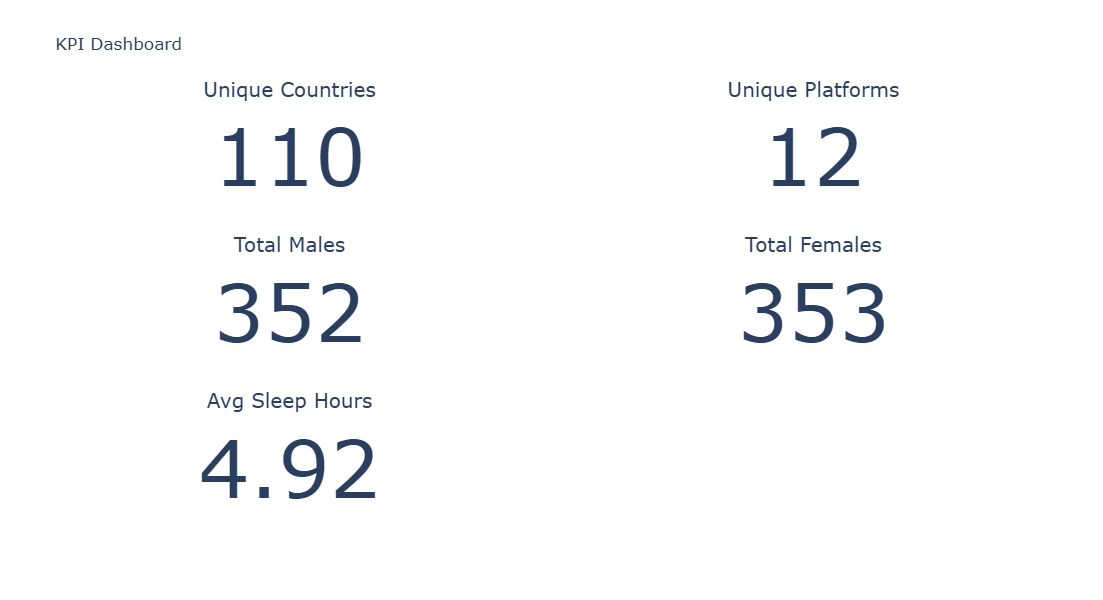

In [26]:
import plotly.graph_objects as go

unique_countries = df['Country'].nunique()
unique_platforms = df['Most_Used_Platform'].nunique()
male_count = (df['Gender'] == 'Male').sum()
female_count = (df['Gender'] == 'Female').sum()
avg_sleep = round(df['Avg_Daily_Usage_Hours'].mean(), 2)

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="number",
    value=unique_countries,
    title={"text": "Unique Countries"},
    domain={'row': 0, 'column': 0}
))

fig.add_trace(go.Indicator(
    mode="number",
    value=unique_platforms,
    title={"text": "Unique Platforms"},
    domain={'row': 0, 'column': 1}
))


fig.add_trace(go.Indicator(
    mode="number",
    value=male_count,
    title={"text": "Total Males"},
    domain={'row': 1, 'column': 0}
))


fig.add_trace(go.Indicator(
    mode="number",
    value=female_count,
    title={"text": "Total Females"},
    domain={'row': 1, 'column': 1}
))


fig.add_trace(go.Indicator(
    mode="number",
    value=avg_sleep,
    title={"text": "Avg Sleep Hours"},
    domain={'row': 2, 'column': 0}
))

fig.update_layout(
    grid={'rows': 3, 'columns': 2, 'pattern': "independent"},
    height=600,
    template="plotly_white",
    title="KPI Dashboard"
)

fig.show()


###        Exploratory Data Analysis (EDA) 

####        Platforms Affecting Academic Performance

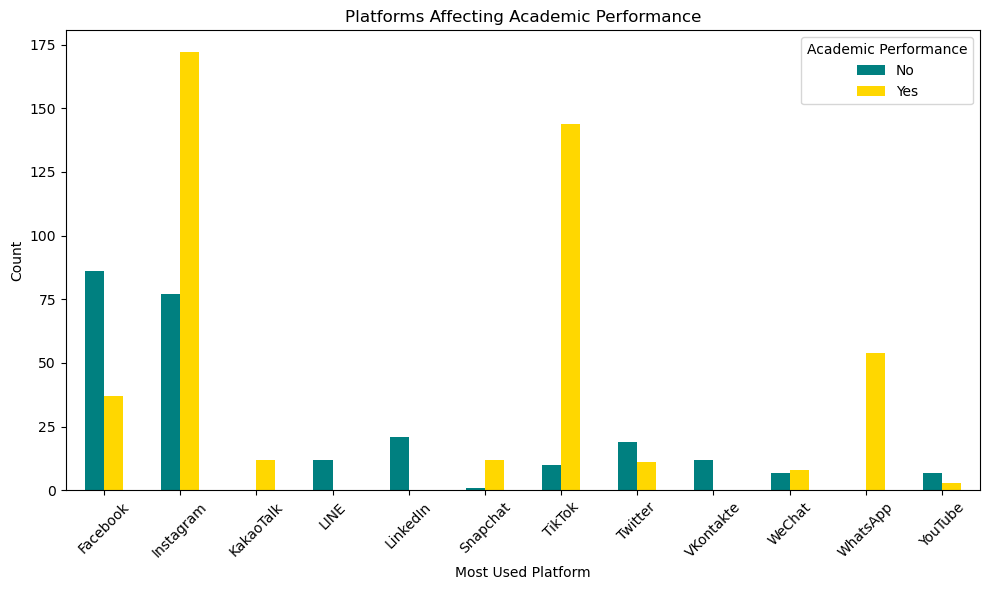

In [55]:
cross_tab = pd.crosstab(df['Most_Used_Platform'], df['Affects_Academic_Performance'])
cross_tab.plot(kind='bar', figsize=(10,6), color=['teal', 'gold'])

plt.title('Platforms Affecting Academic Performance')
plt.xlabel('Most Used Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Academic Performance')
plt.tight_layout()
plt.show()


This bar chart compares how academic performance is affected across different social media platforms. It shows the count of students per platform categorized by their reported academic impact.


####        Mental Health score by gender

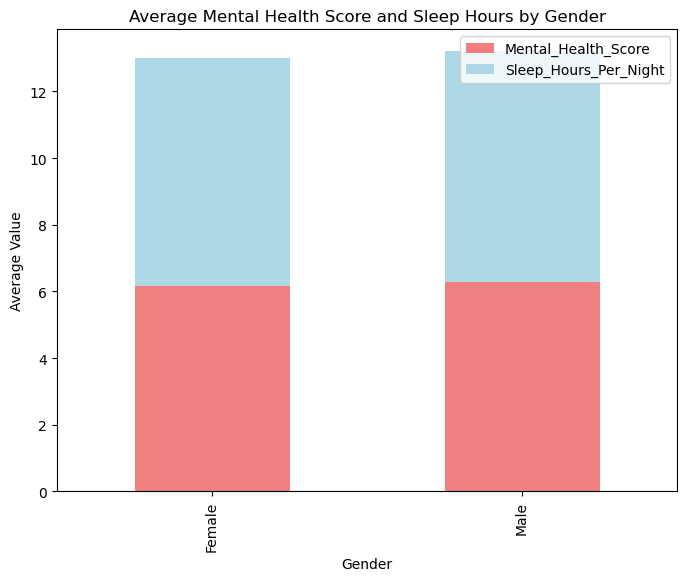

In [56]:
grouped = df.groupby('Gender')[['Mental_Health_Score', 'Sleep_Hours_Per_Night']].mean()

grouped.plot(kind='bar', stacked=True, figsize=(8,6), color=['lightcoral', 'lightblue'])
plt.title('Average Mental Health Score and Sleep Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Value')
plt.show()


This stacked bar chart shows the average mental health scores and sleep hours for each gender. It highlights differences in well-being and rest patterns between male and female students.

####        Countries by Academic Level 

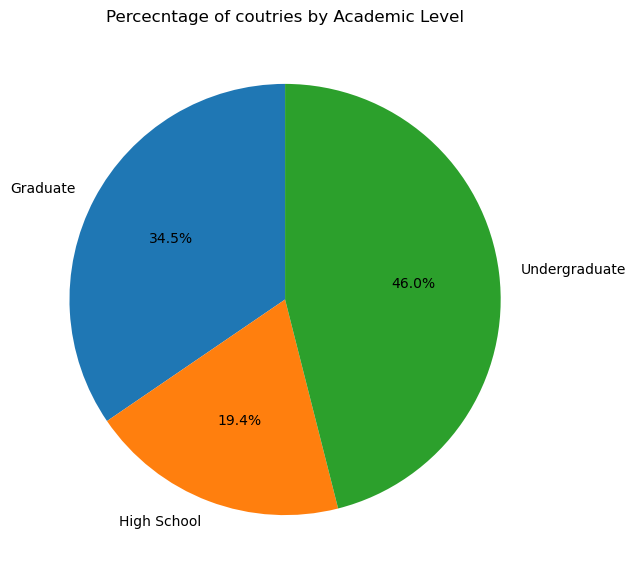

In [57]:
country_counts_per_level = df.groupby('Academic_Level')['Country'].nunique()

plt.figure(figsize=(7,7))
country_counts_per_level.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percecntage of coutries by Academic Level')
plt.ylabel('')  
plt.show()


This pie chart shows the percentage of countries that have students in each academic level. It highlights how widely each academic level is represented across different countries.
